In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Define inputs
d0 = 129.5 #Base height (meters)
d1 = 107 #Length of the first arm segment (meters)
d2 = 107 #Length of the second arm segment (meters)
d3 = 73.6 #% Target end-effector position and orientation [x; y; z; alpha]

P = [100, 100, 200, 0]  # Example end-effector position and orientation

def DHmethode(a, alpha, d, theta):
    # Translation sur x
    T1 = np.array([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Rotation sur x
    T2 = np.array([[1, 0,            0,             0],
                   [0, math.cos(alpha), -math.sin(alpha), 0],
                   [0, math.sin(alpha),  math.cos(alpha), 0],
                   [0, 0,            0,             1]])

    # Translation sur z
    T3 = np.array([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])

    # Rotation sur z
    T4 = np.array([[math.cos(theta), -math.sin(theta), 0, 0],
                   [math.sin(theta),  math.cos(theta), 0, 0],
                   [0,             0,              1, 0],
                   [0,             0,              0, 1]])

    # Matrice globale
    T = np.dot(np.dot(np.dot(T1, T2), T3), T4)

    return T

def calculate_joint_angles(P):
    x, y, z, alpha = P

    # Calculate q1
    q1 = math.atan2(y, x)

    # Calculate Ex, Ey, Ez
    Ex = x / math.cos(q1)
    Ey = y
    Ez = z - d0
    Ex = Ex - d3 * math.cos(alpha)
    Ez = Ez - d3 * math.sin(alpha)

    # Calculate C
    C = (Ex**2 + Ez**2 - d1**2 - d2**2) / (2*d1*d2)

    # Calculate q31, q21, q41, q32, q22, q42
    q31 = math.acos(C)
    q32 = -math.acos(C)
    q21 = math.atan2(Ez, Ex) - math.atan2(d2 * math.sin(q31), d1 + d2 * math.cos(q31))
    q41 = alpha - q21 - q31
    q22 = math.atan2(Ez, Ex) - math.atan2(d2 * math.sin(q32), d1 + d2 * math.cos(q32))
    q42 = alpha - q22 - q32

    # Define the joint angles
    Q1 = [q1, q21, q31, q41]
    Q2 = [q1, q22, q32, q42]

    return Q1


q1, q21, q31, q41 = calculate_joint_angles(P)

# Calculate the transformation matrix
T01 = DHmethode(0, 0, d0, q1)
T12 = DHmethode(0, math.pi/2, 0, q21)
T23 = DHmethode(d1, 0, 0, q31)
T34 = DHmethode(d2, 0, 0, q41)
T45 = DHmethode(d3, 0, 0, 0)

T05 = np.dot(np.dot(np.dot(np.dot(T01, T12), T23), T34), T45)
T05 = np.around(T05, decimals=2)
print(T05)


[[  0.71   0.     0.71 100.  ]
 [  0.71   0.    -0.71 100.  ]
 [ -0.     1.     0.   200.  ]
 [  0.     0.     0.     1.  ]]


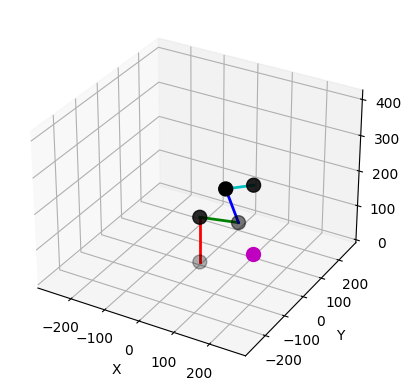

In [19]:
# Define the lengths of the arm segments (in meters)
L0 = d0
L1 = d1
L2 = d2
L3 = d3

# Define the joint angles (in radians)
tht1 = q1
tht2 = q21
tht3 = q31
tht4 = q41

# Calculate the positions of the end effector and joints
x1, y1, z1 = 0, 0, L0

x2 = L1 * np.cos(tht1) * np.cos(tht2)
y2 = L1 * np.cos(tht2) * np.sin(tht1)
z2 = L0 + L1 * np.sin(tht2)

x3 = L1 * np.cos(tht1) * np.cos(tht2) - L2 * (np.cos(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht1) * np.cos(tht2) * np.cos(tht3))
y3 = L1 * np.cos(tht2) * np.sin(tht1) - L2 * (np.sin(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht2) * np.cos(tht3) * np.sin(tht1))
z3 = L0 + L2 * (np.cos(tht2) * np.sin(tht3) + np.cos(tht3) * np.sin(tht2)) + L1 * np.sin(tht2)

x4 = L1 * np.cos(tht1) * np.cos(tht2) - L3 * (np.sin(tht4) * (np.cos(tht1) * np.cos(tht2) * np.sin(tht3) + np.cos(tht1) * np.cos(tht3) * np.sin(tht2)) + np.cos(tht4) * (np.cos(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht1) * np.cos(tht2) * np.cos(tht3))) - L2 * (np.cos(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht1) * np.cos(tht2) * np.cos(tht3))
y4 = L1 * np.cos(tht2) * np.sin(tht1) - L3 * (np.sin(tht4) * (np.cos(tht2) * np.sin(tht1) * np.sin(tht3) + np.cos(tht3) * np.sin(tht1) * np.sin(tht2)) + np.cos(tht4) * (np.sin(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht2) * np.cos(tht3) * np.sin(tht1))) - L2 * (np.sin(tht1) * np.sin(tht2) * np.sin(tht3) - np.cos(tht2) * np.cos(tht3) * np.sin(tht1))
z4 = L0 + L3 * (np.sin(tht4) * (np.cos(tht2) * np.cos(tht3) - np.sin(tht2) * np.sin(tht3)) + np.cos(tht4) * (np.cos(tht2) * np.sin(tht3) + np.cos(tht3) * np.sin(tht2))) + L2 * (np.cos(tht2) * np.sin(tht3) + np.cos(tht3) * np.sin(tht2)) + L1 * np.sin(tht2)

# Define the coordinates of the arm
x = [0, x1, x2, x3, x4]
y = [0, y1, y2, y3, y4]
z = [0, z1, z2, z3, z4]

# Define the colors of each link
colors = ['r', 'g', 'b', 'c']

# Plot the arm in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the links of the arm
for i in range(len(x) - 1):
    ax.plot([x[i], x[i+1]], [y[i], y[i+1]], [z[i], z[i+1]], color=colors[i], linewidth=2)

# Plot the joints
ax.scatter(x, y, z, s=100, color='k')

# Plot the end-effector point
ax.scatter(x4, y4, 0, s=100, color='m', marker='o')

# Set appropriate limits based on the arm length
a = d1 + d2 + d3
b = d0 + d1 + d2 + d3
ax.set_xlim([-a, a])
ax.set_ylim([-a, a])
ax.set_zlim([0, b])

plt.show()
